In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
# Carga de datos
df = pd.read_csv('../DataWarehouse/data.csv')
df.head()

,sample,id,disease_type,case_id,submitter_id,primary_site,alcohol_history.exposures,race.demographic,gender.demographic,ethnicity.demographic,...,sample_type_id.samples,tumor_descriptor.samples,sample_id.samples,sample_type.samples,preservation_method.samples,specimen_type.samples,is_ffpe.samples,tissue_type.samples,tipo_cancer_TCGA,tipo_cancer_general
0,TCGA-B0-5695-01A,fb9bafa5-7133-4955-8156-4eb6763dc8e1,Adenomas and Adenocarcinomas,fb9bafa5-7133-4955-8156-4eb6763dc8e1,TCGA-B0-5695,Kidney,Not Reported,white,female,not hispanic or latino,...,1,Primary,86e4862c-7405-40b5-b73f-be0c6c52ea6d,Primary Tumor,Unknown,Unknown,False,Tumor,KIRC,Riñón
1,TCGA-BP-4807-01A,33cf0893-0411-4758-aa90-602bfedf0850,Adenomas and Adenocarcinomas,33cf0893-0411-4758-aa90-602bfedf0850,TCGA-BP-4807,Kidney,Not Reported,white,male,not reported,...,1,Primary,26307437-2f30-4647-81ac-f6bae5be6113,Primary Tumor,Unknown,Unknown,False,Tumor,KIRC,Riñón
2,TCGA-BP-4807-11A,33cf0893-0411-4758-aa90-602bfedf0850,Adenomas and Adenocarcinomas,33cf0893-0411-4758-aa90-602bfedf0850,TCGA-BP-4807,Kidney,Not Reported,white,male,not reported,...,11,Not Applicable,6a8ad307-fada-432d-a223-8d9780c4eccc,Solid Tissue Normal,Unknown,Solid Tissue,False,Normal,KIRC,Riñón
3,TCGA-BP-4995-01A,9245a557-01ea-4446-b9e9-313f6ab18834,Adenomas and Adenocarcinomas,9245a557-01ea-4446-b9e9-313f6ab18834,TCGA-BP-4995,Kidney,Not Reported,white,male,not hispanic or latino,...,1,Primary,5cd539b8-90bf-4465-826f-73269ea2e802,Primary Tumor,Unknown,Unknown,False,Tumor,KIRC,Riñón
4,TCGA-BP-4995-11A,9245a557-01ea-4446-b9e9-313f6ab18834,Adenomas and Adenocarcinomas,9245a557-01ea-4446-b9e9-313f6ab18834,TCGA-BP-4995,Kidney,Not Reported,white,male,not hispanic or latino,...,11,Not Applicable,8b6e49fe-5470-476d-9695-0caee2896d66,Solid Tissue Normal,Unknown,Solid Tissue,False,Normal,KIRC,Riñón


In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sample,12797,12797,TCGA-B0-5695-01A,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,12797,11119,86b165c2-d0e6-4a4f-84ed-aa95e3133627,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disease_type,12797,26,Adenomas and Adenocarcinomas,5472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
case_id,12797,11119,86b165c2-d0e6-4a4f-84ed-aa95e3133627,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
submitter_id,12797,11119,TCGA-92-7340,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
specimen_type.samples,12797,3,Solid Tissue,10437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_ffpe.samples,12797,2,False,12733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tissue_type.samples,12797,2,Tumor,11379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_cancer_TCGA,12797,33,BRCA,1254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


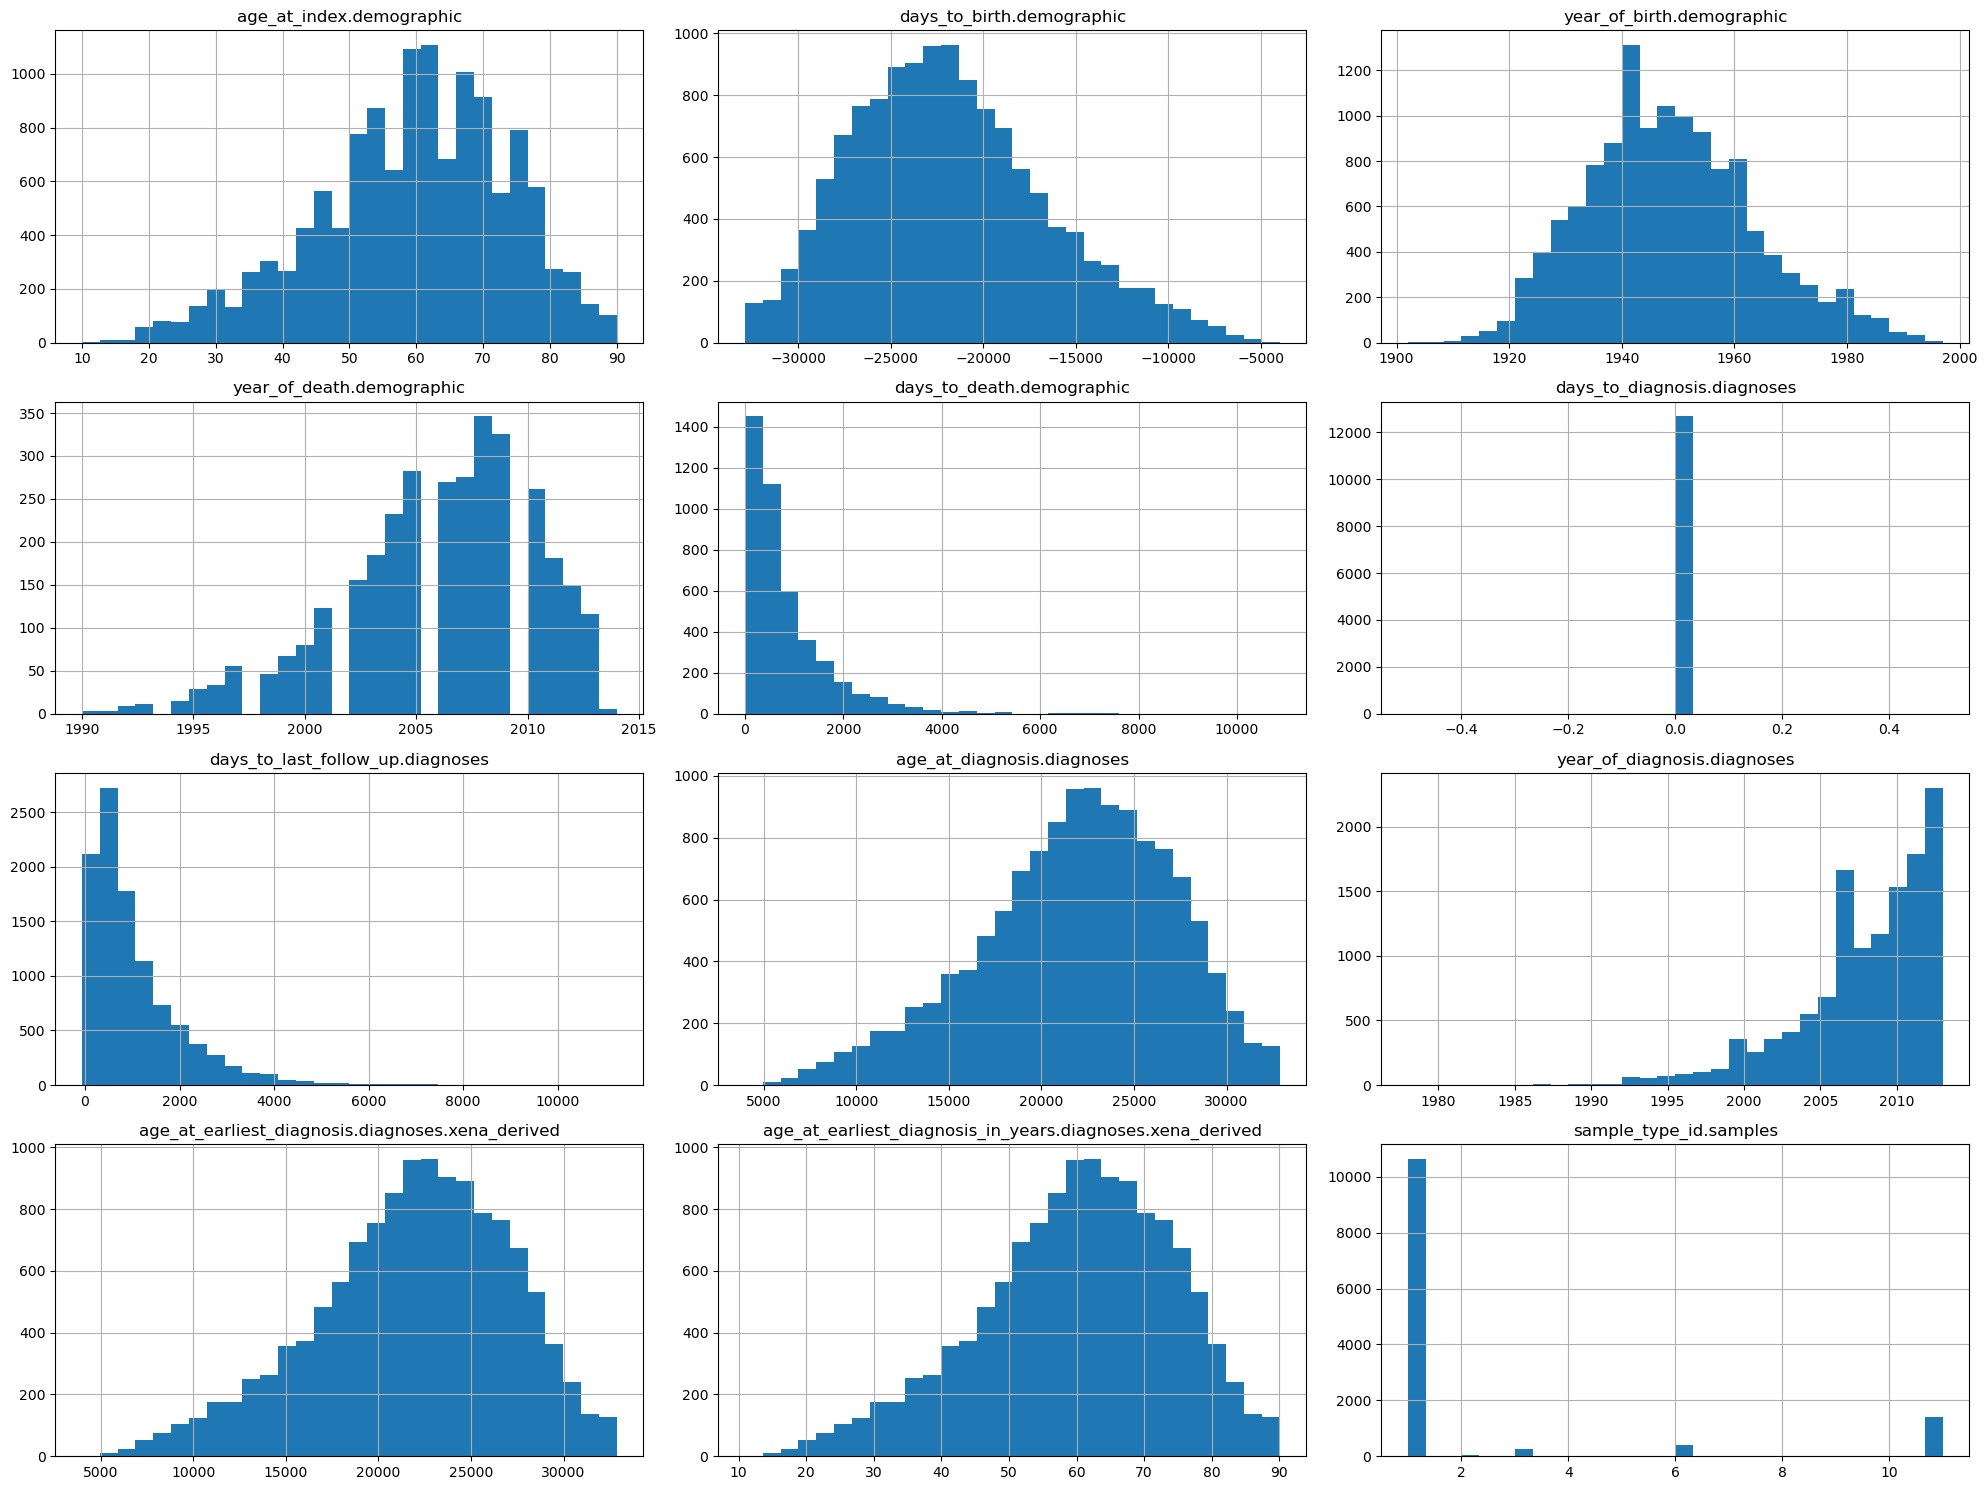

In [14]:
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

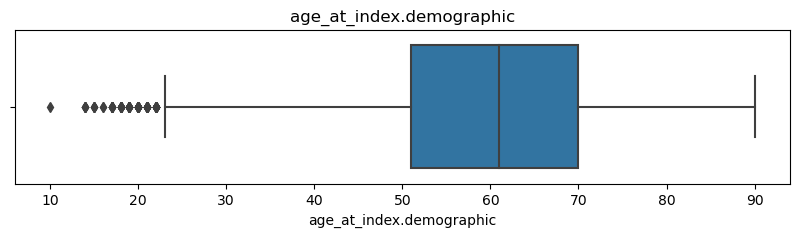

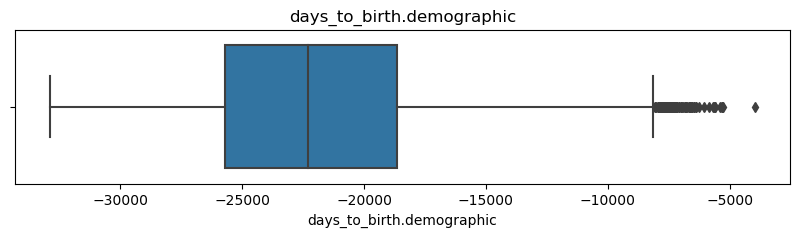

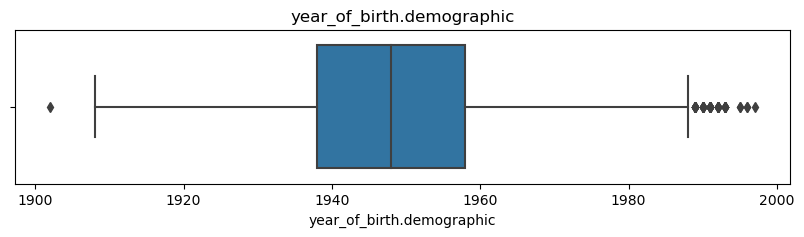

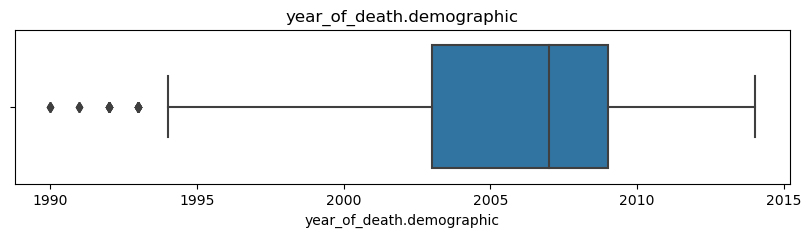

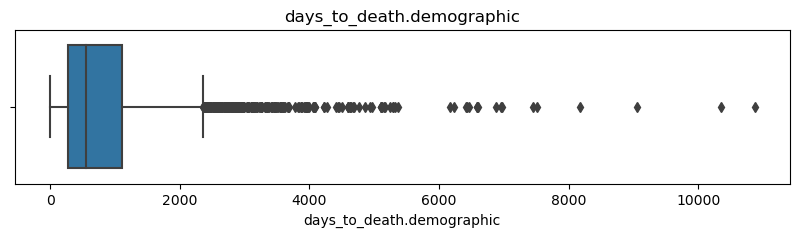

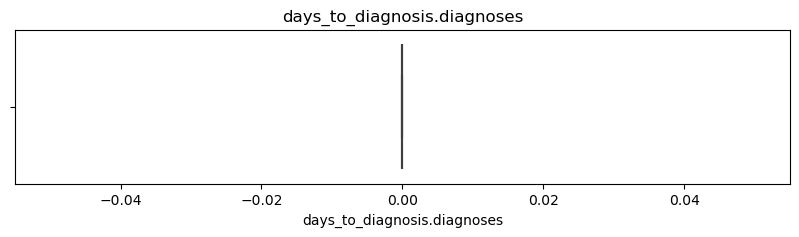

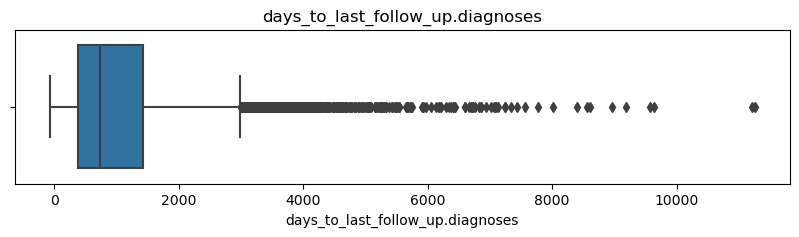

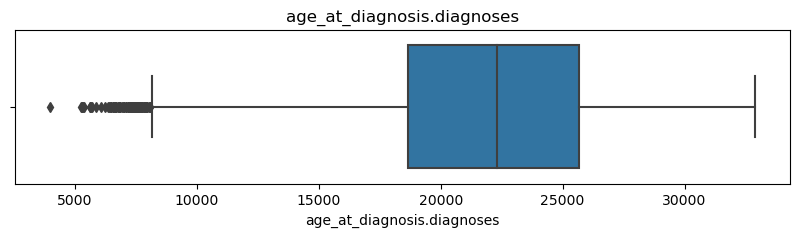

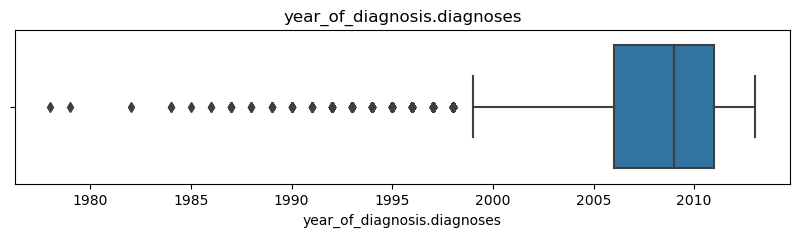

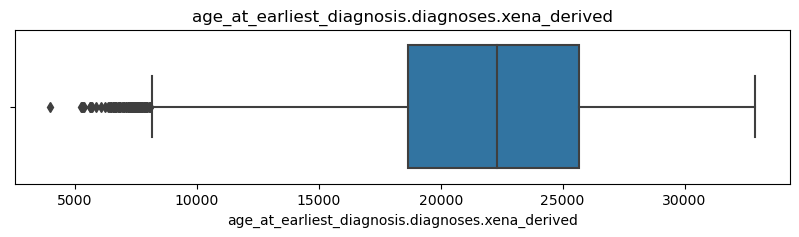

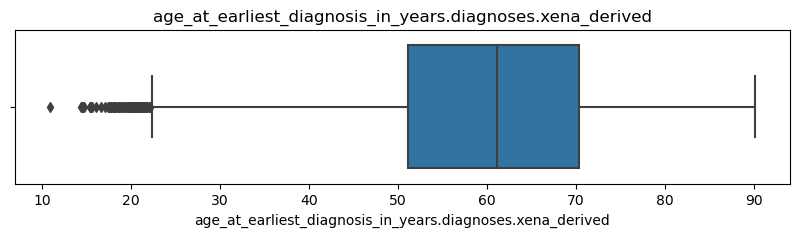

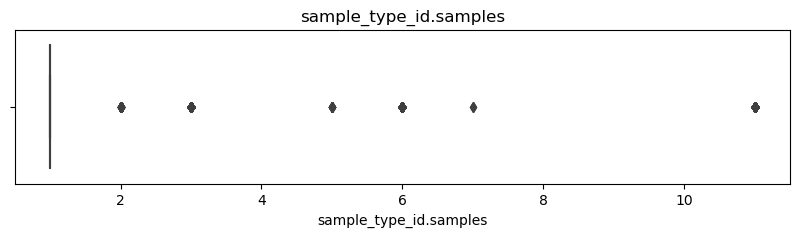

In [15]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

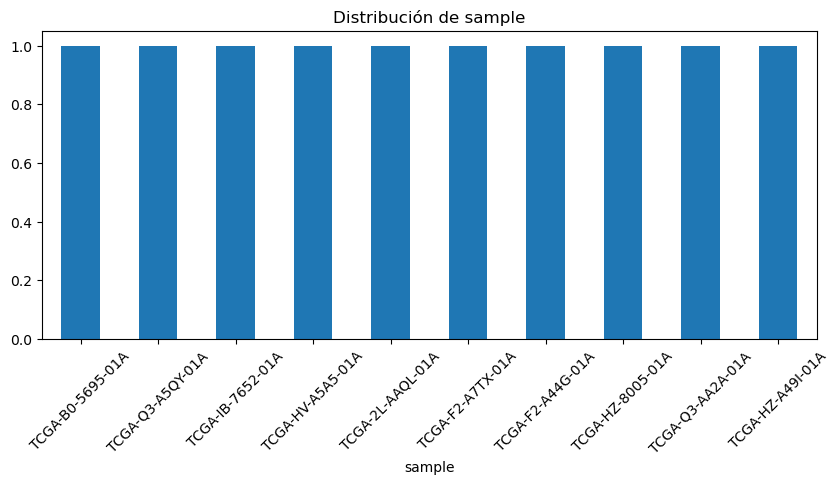

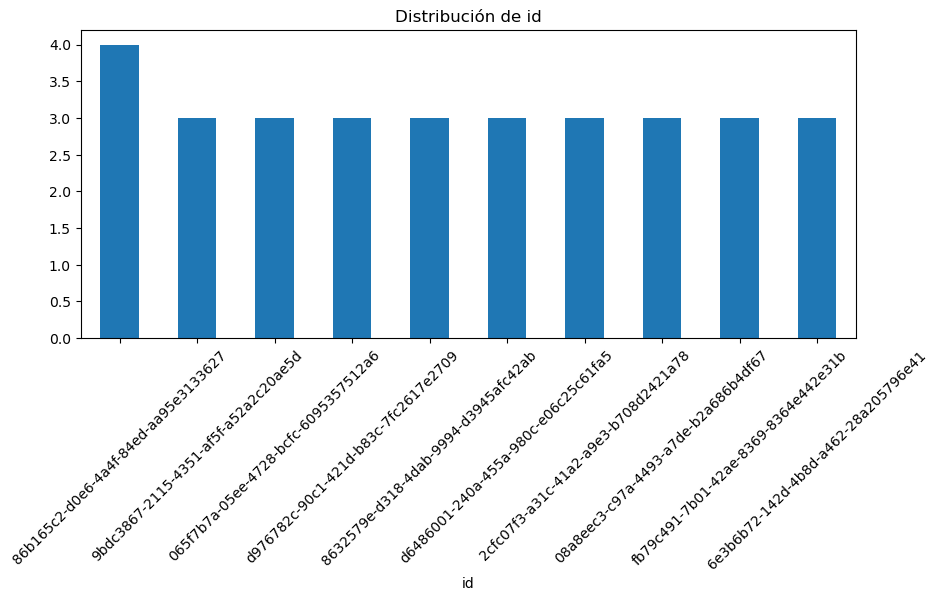

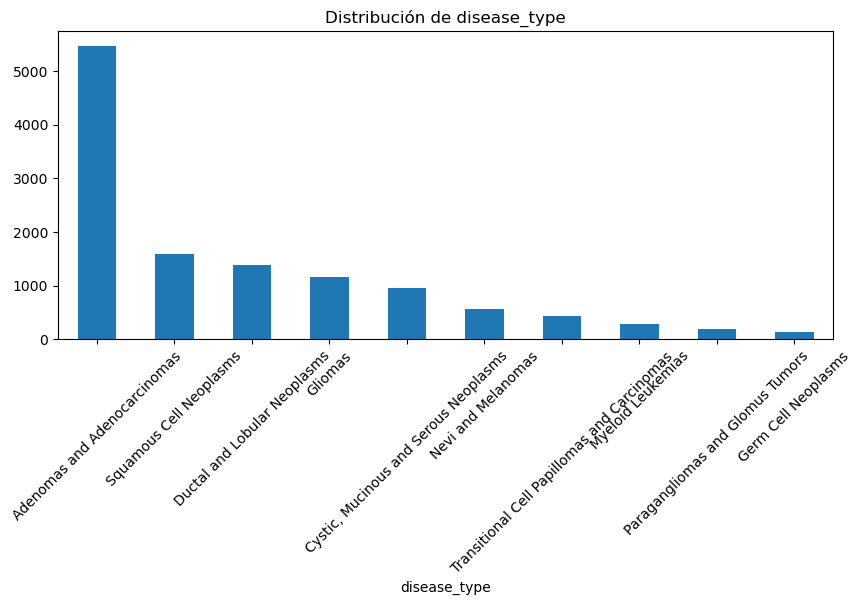

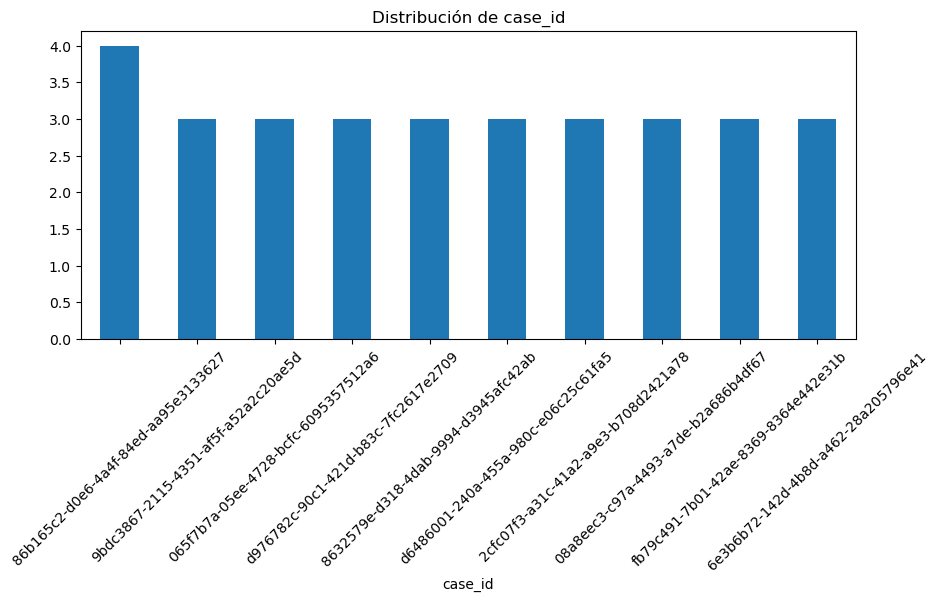

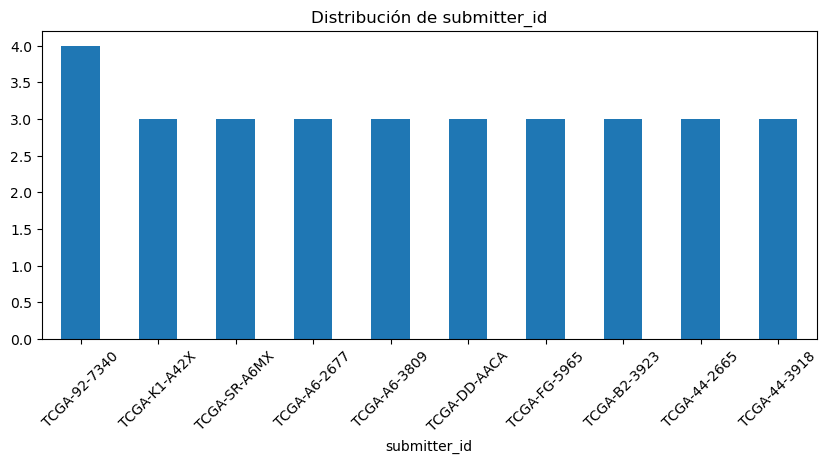

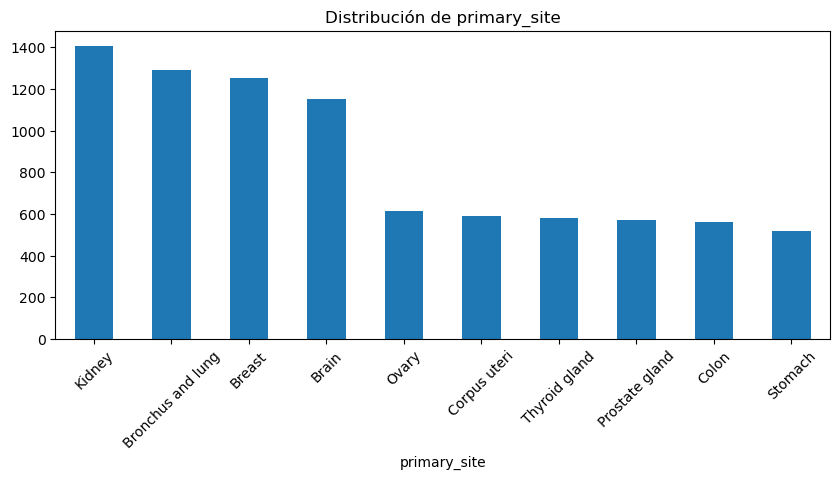

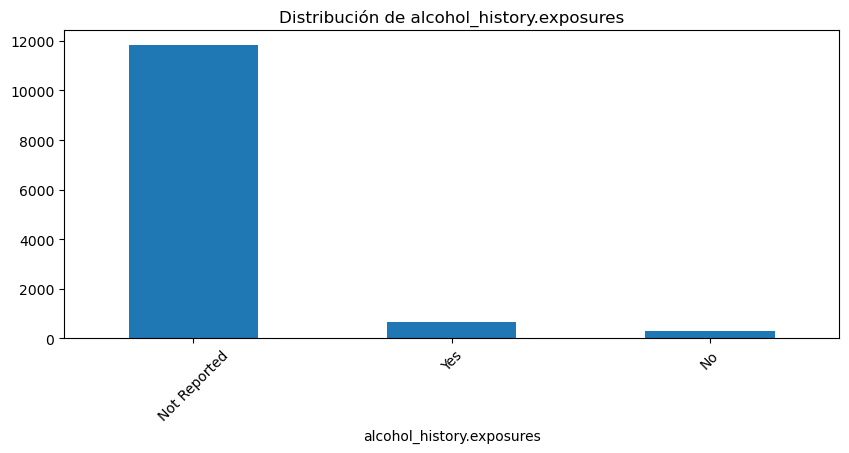

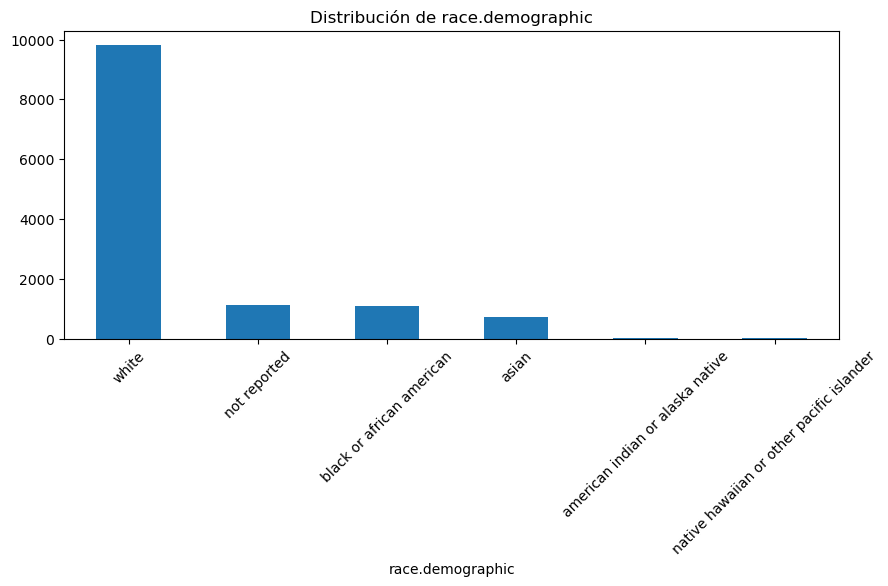

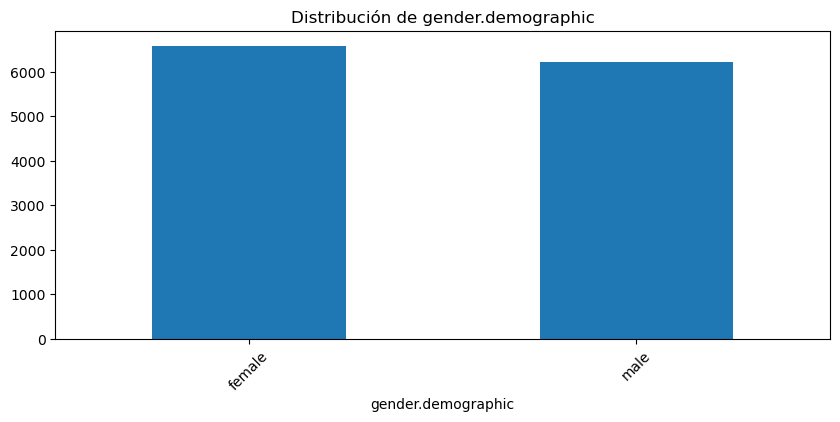

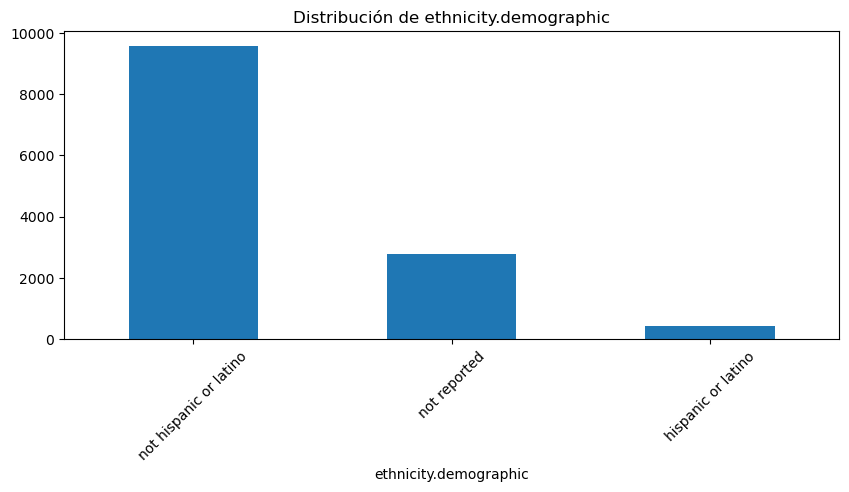

In [16]:
categoricas = df.select_dtypes(include='object')
for col in categoricas.columns[:10]:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()